In [149]:
import pandas as pd
import requests
from urllib.parse import urlencode
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [5]:
path = 'https://disk.yandex.ru/d/DqsoMAMSlyd2hQ'

In [8]:
# подготовка ссылок для загрузки в датафреймы
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=path))
response = requests.get(final_url)
download_url = response.json()['href']

In [22]:
df.shape

(16291, 11)

In [56]:
df = pd.read_csv(download_url).dropna().reset_index()

In [57]:
df.isna().sum()

index           0
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [48]:
df.drop(columns=['index'], inplace=True)

In [68]:
df.Year = df.Year.astype(int)

In [143]:
df.dtypes

index             int64
Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [110]:
df.shape[0]

16291

In [111]:
df.query('Year > 2007').shape[0] / df.shape[0]

0.4906390031305629

In [93]:
sales_by_year = df.groupby('Year', as_index=False).agg({'Global_Sales': 'count'})
mean_sales = sales_by_year.Global_Sales.mean()
median_sales = sales_by_year.Global_Sales.median()
mode_sales = sales_by_year.Global_Sales.mode()
print(f'median_sales={median_sales}\nmean_sales={mean_sales}\nmode_sales={mode_sales}')

median_sales=289.0
mean_sales=417.71794871794873
mode_sales=0    14
1    16
2    17
dtype: int64


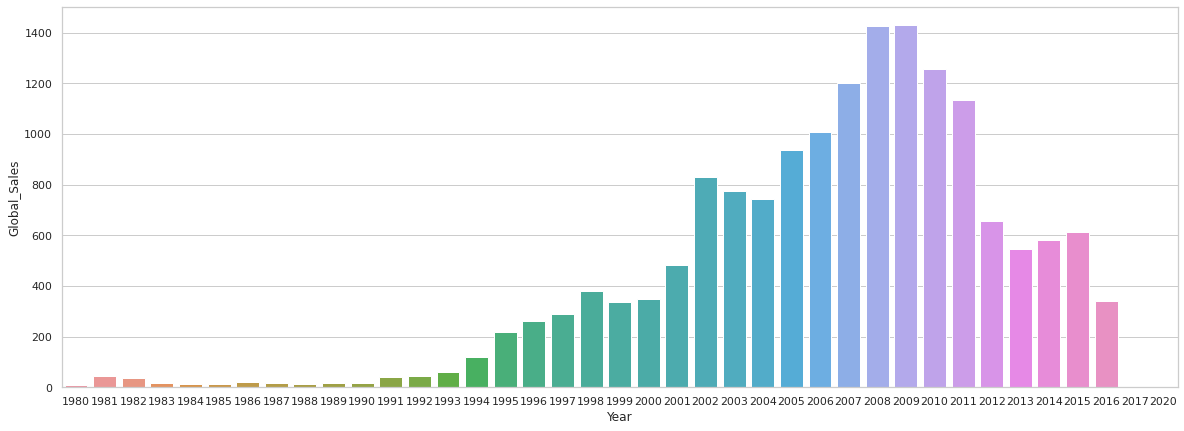

In [94]:
sns.barplot(data=sales_by_year, x='Year', y='Global_Sales')

In [112]:
df.describe()

,index,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8288.086060,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.375439,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4130.500000,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8290.000000,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.500000,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16597.000000,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [121]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Team17 Software                    1
Playmates                          1
SSI                                1
Wizard Video Games                 1
Pow                                1
Name: Publisher, Length: 576, dtype: int64

In [95]:
scipy.stats.mode(sales_by_year.Global_Sales)

ModeResult(mode=array([14]), count=array([2]))

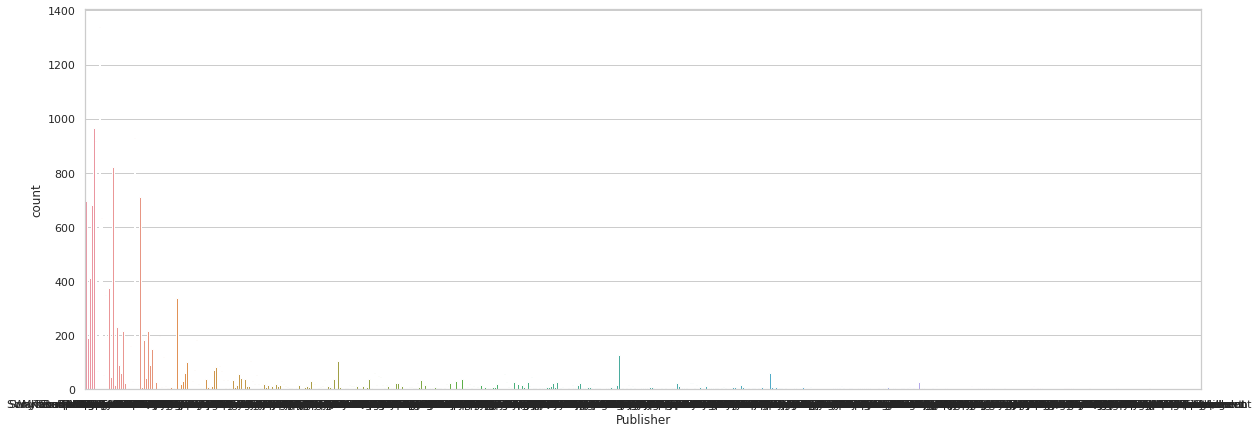

In [119]:
sns.countplot(data=df, x='Publisher')

In [118]:
df

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [134]:
cols= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df.agg(['mean', 'median', 'std'])
# 

,index,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,8288.086060,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
median,8290.000000,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
std,4792.375439,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345


In [164]:
df_g = df.query('Publisher == "Nintendo" and \
(Genre == "Fighting" or Genre == "Simulation" or \
Genre == "Platform" or Genre == "Racing" or Genre == "Sports")') \
.groupby(['Genre', 'Year'], as_index=False) \
.agg({'Global_Sales': 'sum'})
df_g

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


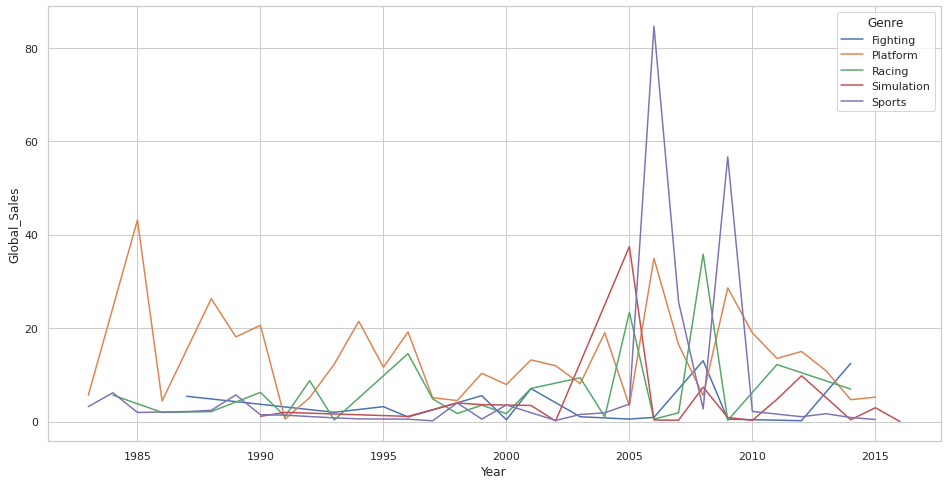

In [168]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_g, x='Year', y='Global_Sales', hue='Genre')

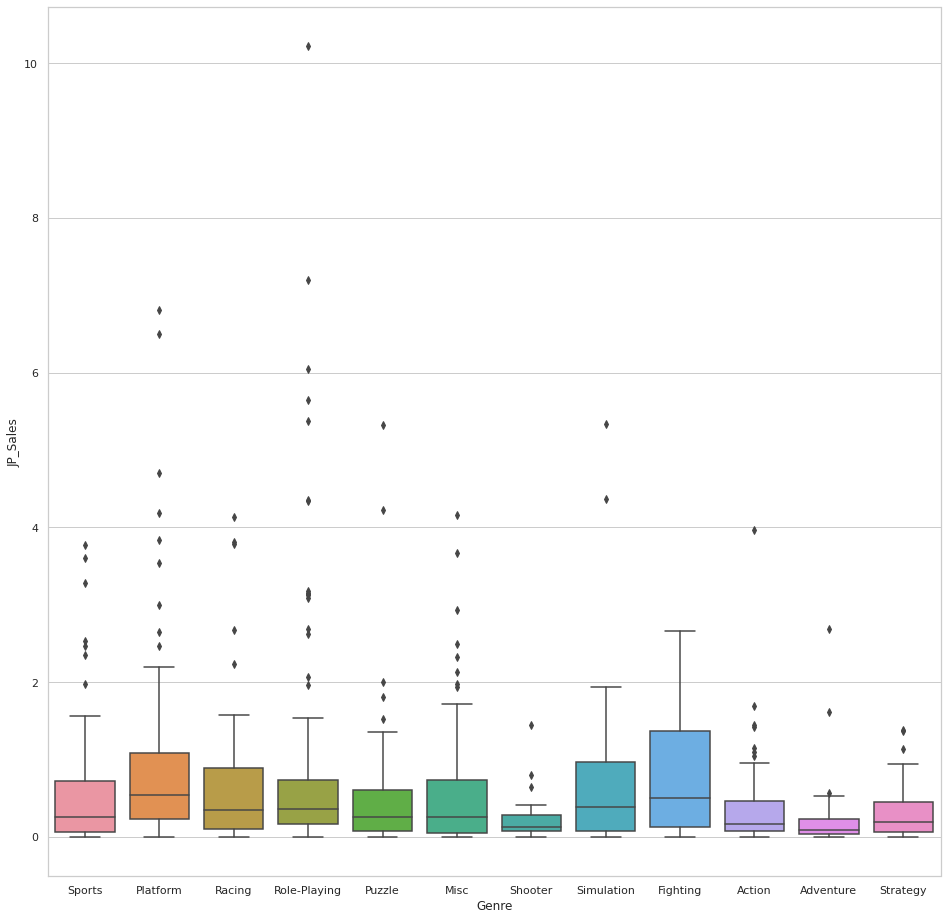

In [158]:
plt.figure(figsize=(16,16))
sns.boxplot(data = df_g, x='Genre', y='JP_Sales')